# Requirements

In [ ]:
import pandas as pd

In [ ]:
# Add as many imports as you need.
import numpy as np

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [ ]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 108MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('/content/climate-data.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'meantemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'meanpressure'}>]], dtype=object)

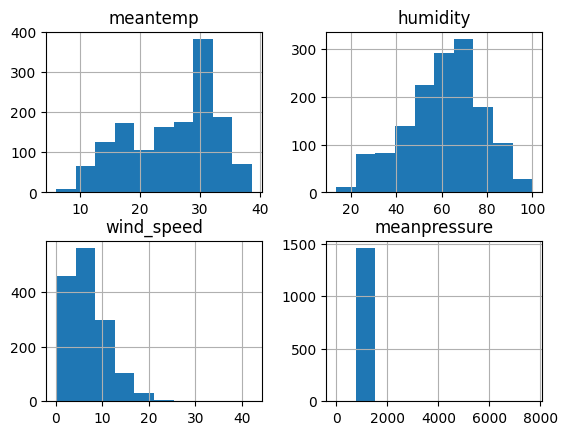

In [ ]:
# Write your code here. Add as many boxes as you need.
df.hist()

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [ ]:
data = df
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [ ]:
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
data_copy=data

In [ ]:
data = data.sort_values(by='date', ascending=False)
for i in range(1, 4):
  data[f'meantemp from {i} days ago'] = data['meantemp'].shift(i)

for i in range(1, 4):
  data[f'humidity from {i} days ago'] = data['humidity'].shift(i)
data=data.drop('humidity', axis=1)

for i in range(1, 4):
  data[f'wind_speed from {i} days ago'] = data['wind_speed'].shift(i)
data=data.drop('wind_speed', axis=1)

for i in range(1, 4):
  data[f'meanpressure from {i} days ago'] = data['meanpressure'].shift(i)
data=data.drop('meanpressure', axis=1)

In [ ]:
data.dropna(subset=data.columns,axis=0,inplace=True)
data

,meantemp,meantemp from 1 days ago,meantemp from 2 days ago,meantemp from 3 days ago,humidity from 1 days ago,humidity from 2 days ago,humidity from 3 days ago,wind_speed from 1 days ago,wind_speed from 2 days ago,wind_speed from 3 days ago,meanpressure from 1 days ago,meanpressure from 2 days ago,meanpressure from 3 days ago
date,,,,,,,,,,,,,
2016-12-29,15.238095,14.095238,15.052632,10.000000,89.666667,87.000000,100.000000,6.266667,7.325000,0.000000,1017.904762,1016.100000,1016.000000
2016-12-28,17.217391,15.238095,14.095238,15.052632,87.857143,89.666667,87.000000,6.000000,6.266667,7.325000,1016.904762,1017.904762,1016.100000
2016-12-27,16.850000,17.217391,15.238095,14.095238,68.043478,87.857143,89.666667,3.547826,6.000000,6.266667,1015.565217,1016.904762,1017.904762
2016-12-26,17.142857,16.850000,17.217391,15.238095,67.550000,68.043478,87.857143,8.335000,3.547826,6.000000,1017.200000,1015.565217,1016.904762
2016-12-25,14.000000,17.142857,16.850000,17.217391,74.857143,67.550000,68.043478,8.784211,8.335000,3.547826,1016.952381,1017.200000,1015.565217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,6.000000,7.000000,7.000000,8.857143,82.800000,78.600000,63.714286,1.480000,6.300000,7.142857,1018.000000,1020.000000,1018.714286
2013-01-04,8.666667,6.000000,7.000000,7.000000,86.833333,82.800000,78.600000,3.700000,1.480000,6.300000,1016.500000,1018.000000,1020.000000
2013-01-03,7.166667,8.666667,6.000000,7.000000,71.333333,86.833333,82.800000,1.233333,3.700000,1.480000,1017.166667,1016.500000,1018.000000


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.
data = data.reset_index()
data.drop('date',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

y=data['meantemp']

X = data.drop('meantemp',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
y_pred = random_forest_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, y_test))))

Mean Absolute Error : 1.5255690091106928
Mean Squared Error : 3.770128777072364
Root Mean Squared Error : 1.9416819453948588


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
y=data['meantemp']

X = data.drop('meantemp',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:47:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, y_test))))

Mean Absolute Error : 2.723422842965123
Mean Squared Error : 12.274823044534957
Root Mean Squared Error : 3.503544354583649


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

y=data['meantemp']

X = data.drop('meantemp',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=42)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split

In [ ]:
# Write your code here. Add as many boxes as you need.

xgb_model = XGBRegressor()
param_grid = {
    'n_estimators': [50, 100, 150, 200],
}

tscv = TimeSeriesSplit()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation MSE:", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Final Model MSE on Test Set:", mse_test)

Best Parameters: {'n_estimators': 50}
Best Cross-Validation MSE: 3.783829618331443
Final Model MSE on Test Set: 4.692214889967455
